# NCCL Performance evaluations

Main conclusion: 

* For allreduce and all_gather, the best setup is following. We achieve 5-10x improvement over the default setup.

```bash 
export NCCL_NET_GDR_LEVEL=PHB
export NCCL_CROSS_NIC=1
export NCCL_COLLNET_ENABLE=1
export NCCL_NET="AWS Libfabric"
export LD_LIBRARY_PATH=${HOME}/PolarisAT/soft/aws-ofi-nccl/lib:${LD_LIBRARY_PATH}
export FI_CXI_DISABLE_HOST_REGISTER=1
export FI_MR_CACHE_MONITOR=userfaultfd
export FI_CXI_DEFAULT_CQ_SIZE=131072
```

* For alltoall with message size larger than 8MB, additional setup is needed. But this will influence the latency for allreduce and all_gather at smaller message size (<1MB)

```bash 
export FI_CXI_RX_MATCH_MODE=software
export FI_CXI_RDZV_PROTO=alt_read
export FI_CXI_REQ_BUF_SIZE=8388608
```

In [4]:
import matplotlib.pylab as plt
import numpy as np
import os

In [69]:
def getBW(path):
    os.system("grep float %s | awk '{print $1 \" \" $8}' > tmp.dat" %path)
    return np.loadtxt("tmp.dat").transpose()

def getTime(path):
    os.system("grep float %s | awk '{print $1 \" \" $6}' > tmp.dat" %path)
    return np.loadtxt("tmp.dat").transpose()

def getPerf(path, type='BW'):
    if type.find("BW")!=-1:
        return getBW(path)
    if type.find("LT")!=-1:
        return getTime(path)

## Performance difference with different environment setup 
We can see that the optimal setup is (5). We get ```10x``` performance improvement for ```all_reduce``` and ```all_gather```, and ```5x``` improvement for ```alltoall``` over the default setting (1). (3), (4) & (5) have similar performance at small scale. But at large scale, (5) has better performance for alltoall.
### NCCL 2.21, 8 nodes

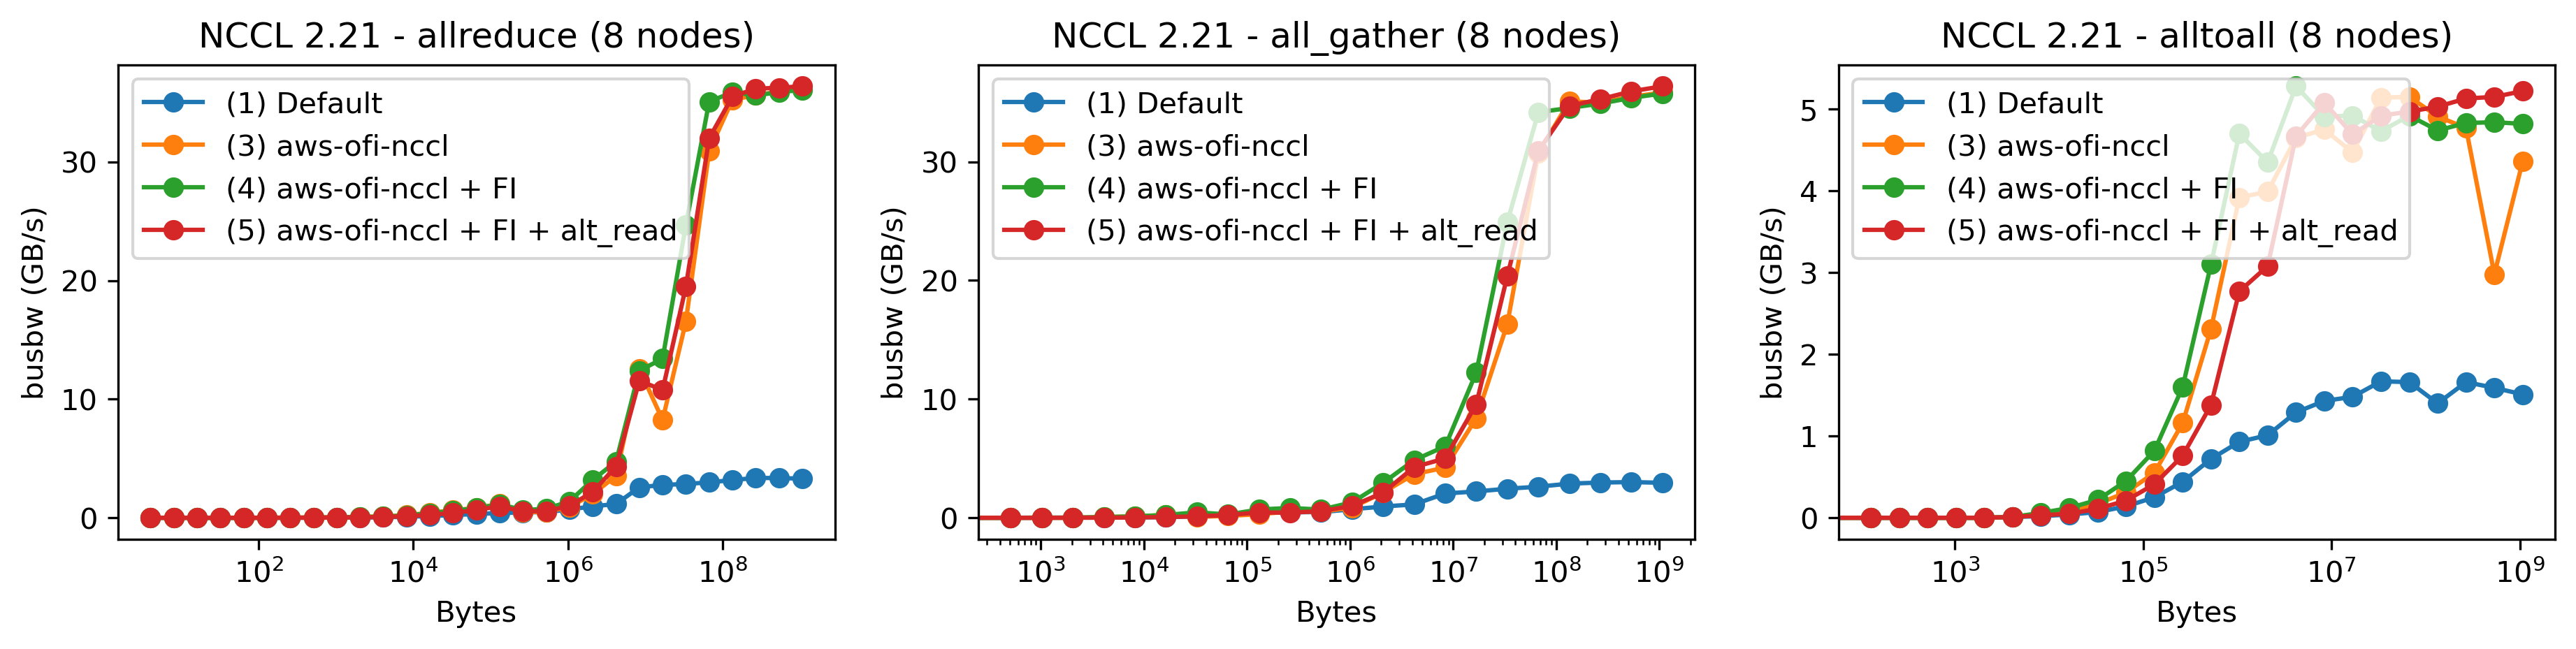

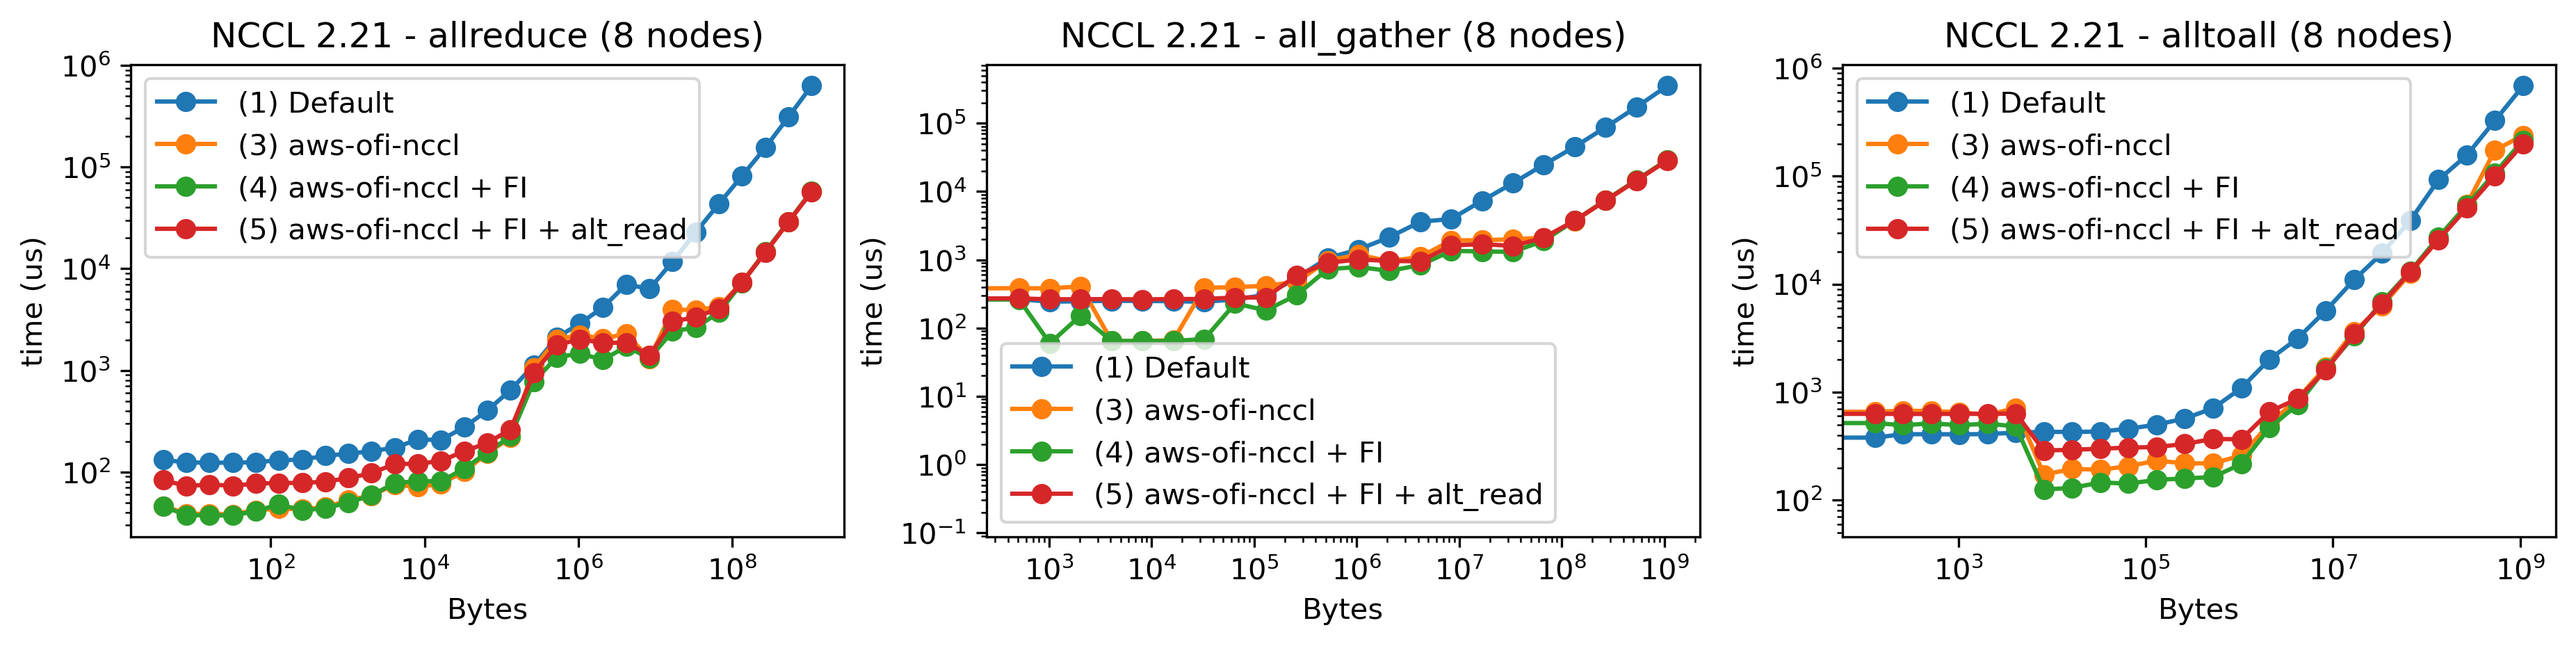

In [81]:
plt.figure(figsize=(15, 3), dpi=300)
plt.subplot(131)
plt.title("NCCL 2.21 - allreduce (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_reduce_output.dat.1")
plt.plot(allreduce[0], allreduce[1], '-o', label='(1) Default')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_reduce_output.dat.3")
plt.plot(allreduce[0], allreduce[1], '-o', label='(3) aws-ofi-nccl')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_reduce_output.dat.4")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) aws-ofi-nccl + FI')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_reduce_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) aws-ofi-nccl + FI + alt_read')
plt.xscale('log')
plt.ylabel("busbw (GB/s)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(132)
plt.title("NCCL 2.21 - all_gather (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_gather_output.dat.1")
plt.plot(allreduce[0], allreduce[1], '-o', label='(1) Default')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_gather_output.dat.3")
plt.plot(allreduce[0], allreduce[1], '-o', label='(3) aws-ofi-nccl')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_gather_output.dat.4")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) aws-ofi-nccl + FI')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_gather_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) aws-ofi-nccl + FI + alt_read')
plt.xscale('log')
plt.ylabel("busbw (GB/s)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(133)
plt.title("NCCL 2.21 - alltoall (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/alltoall_output.dat.1")
plt.plot(allreduce[0], allreduce[1], '-o', label='(1) Default')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/alltoall_output.dat.3")
plt.plot(allreduce[0], allreduce[1], '-o', label='(3) aws-ofi-nccl')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/alltoall_output.dat.4")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) aws-ofi-nccl + FI')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/alltoall_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) aws-ofi-nccl + FI + alt_read')
plt.xscale('log')
plt.ylabel("busbw (GB/s)")
plt.xlabel("Bytes")
plt.legend(loc='upper left')
plt.show()


plt.figure(figsize=(15, 3), dpi=300)
plt.subplot(131)
plt.title("NCCL 2.21 - allreduce (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_reduce_output.dat.1", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(1) Default')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_reduce_output.dat.3",  "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(3) aws-ofi-nccl')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_reduce_output.dat.4", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) aws-ofi-nccl + FI')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_reduce_output.dat.5", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) aws-ofi-nccl + FI + alt_read')
plt.xscale('log')
plt.yscale('log')

plt.ylabel("time (us)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(132)
plt.title("NCCL 2.21 - all_gather (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_gather_output.dat.1", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(1) Default')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_gather_output.dat.3", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(3) aws-ofi-nccl')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_gather_output.dat.4", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) aws-ofi-nccl + FI')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_gather_output.dat.5", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) aws-ofi-nccl + FI + alt_read')
plt.xscale('log')
plt.yscale('log')

plt.ylabel("time (us)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(133)
plt.title("NCCL 2.21 - alltoall (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/alltoall_output.dat.1", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(1) Default')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/alltoall_output.dat.3", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(3) aws-ofi-nccl')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/alltoall_output.dat.4", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) aws-ofi-nccl + FI')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/alltoall_output.dat.5", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) aws-ofi-nccl + FI + alt_read')
plt.xscale('log')
plt.yscale('log')

plt.ylabel("time (us)")
plt.xlabel("Bytes")
plt.legend(loc='upper left')
plt.show()


### NCCL 2.21, 256 nodes

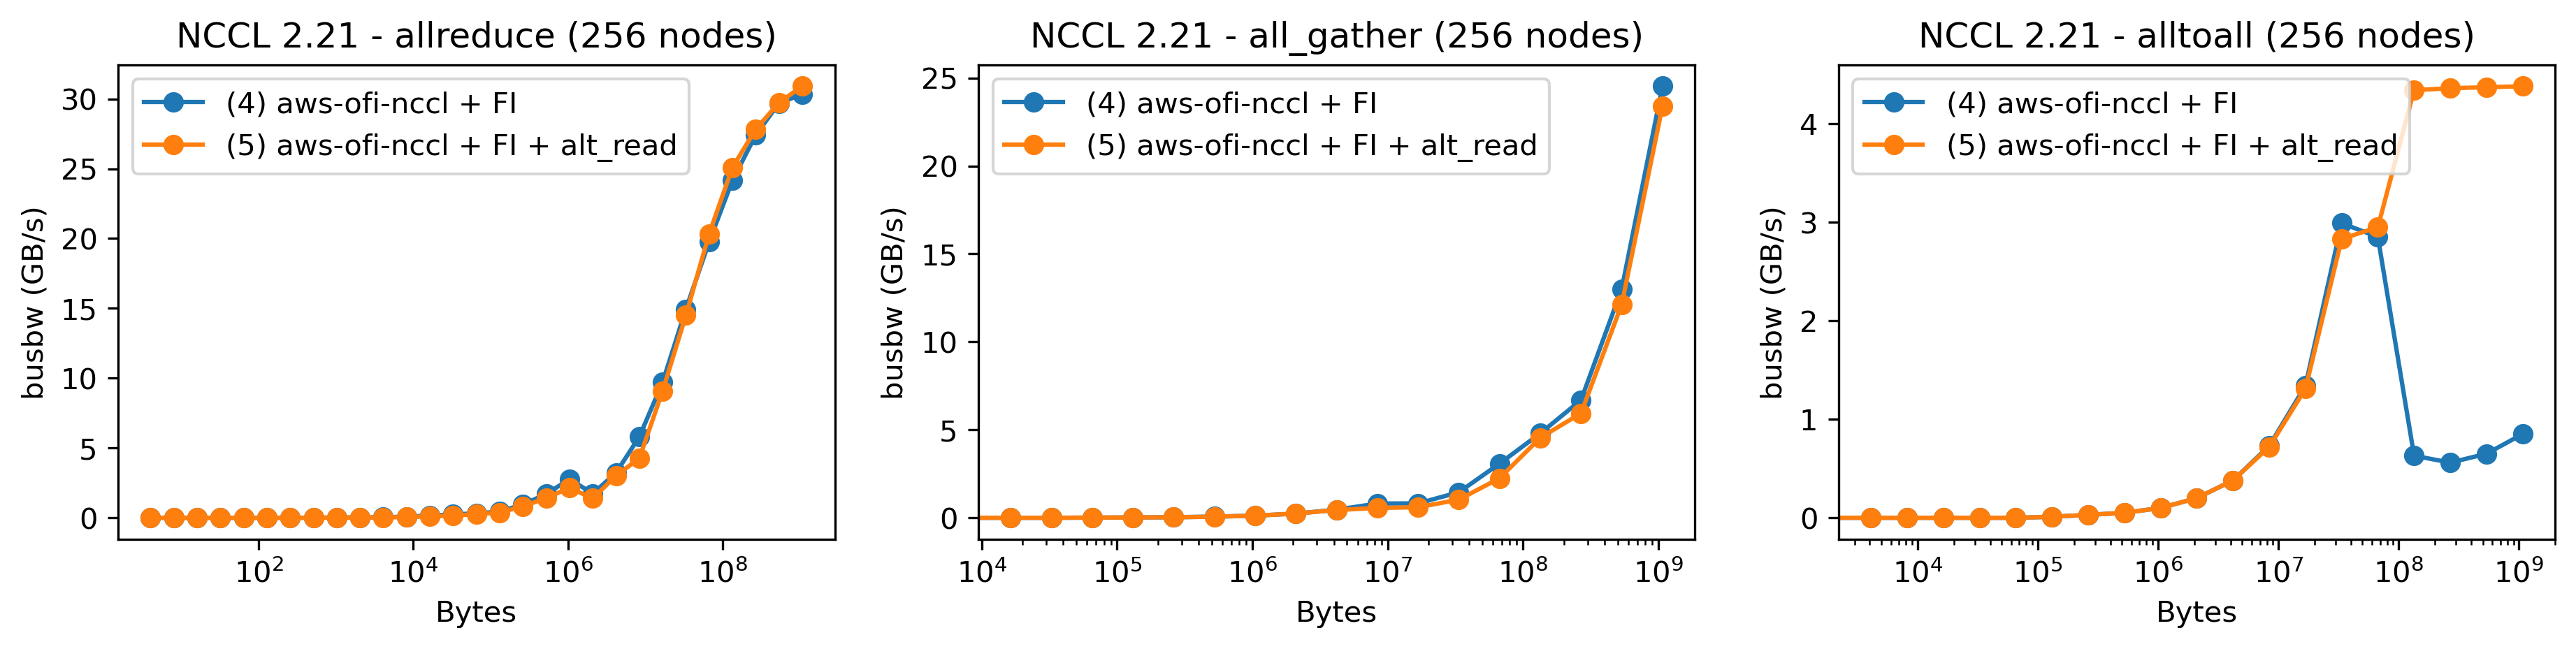

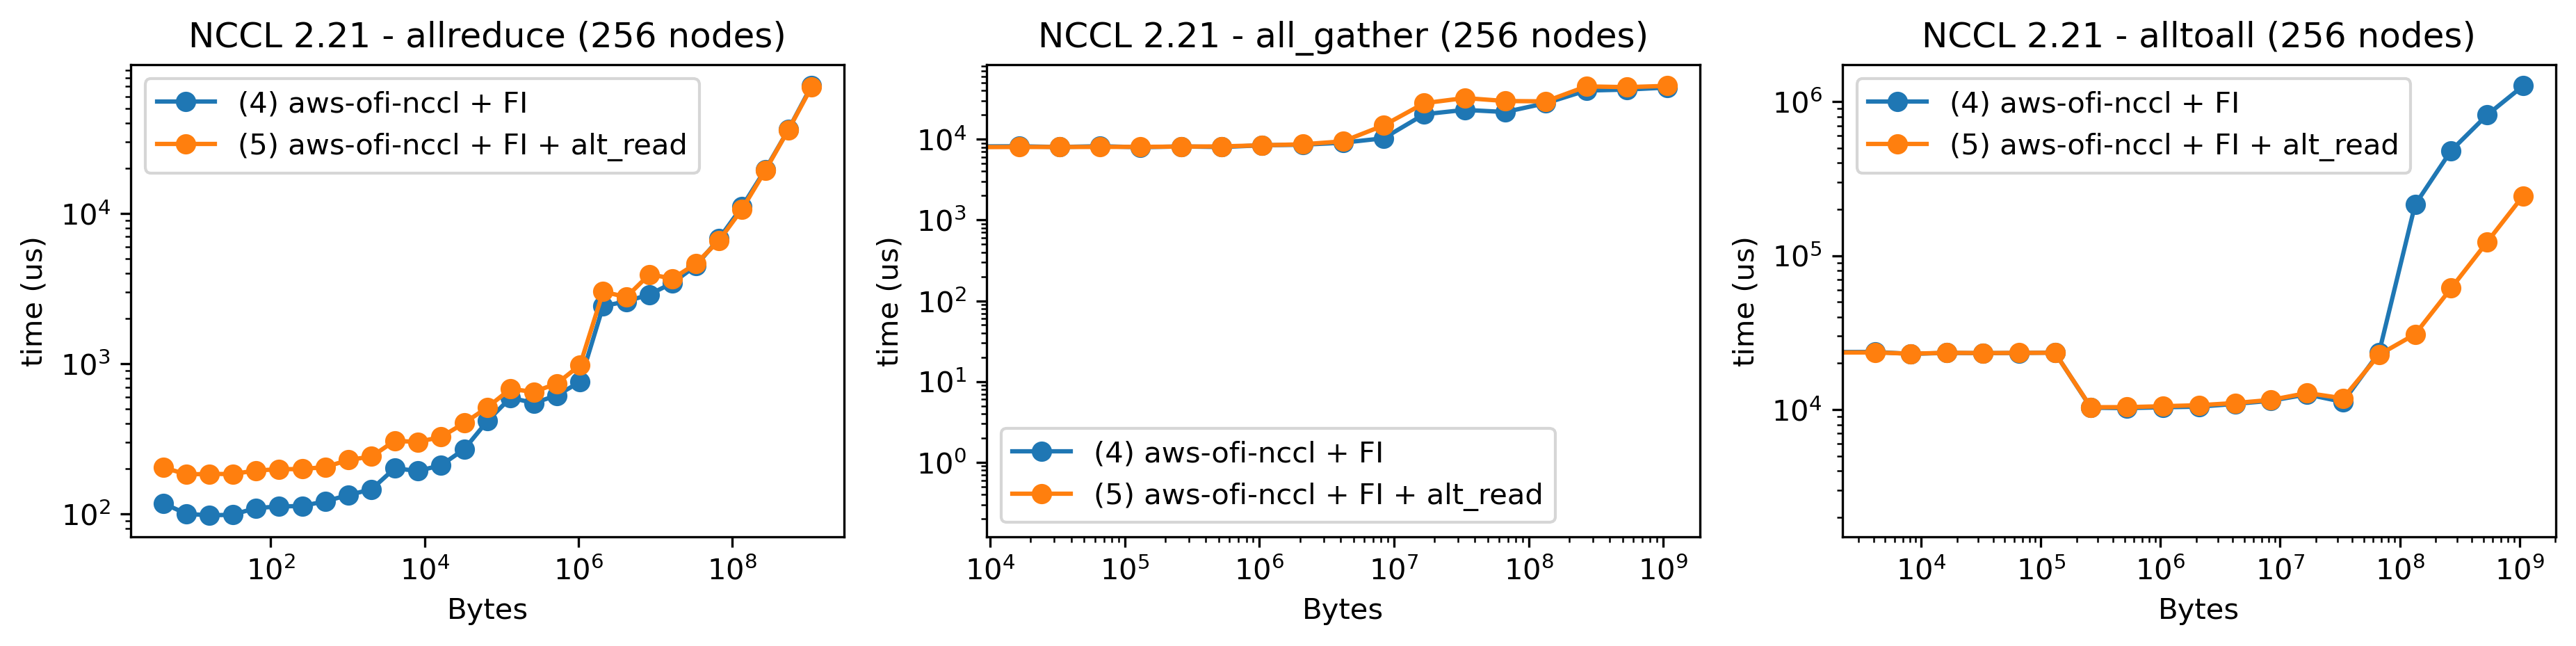

In [82]:
plt.figure(figsize=(15, 3), dpi=300)
plt.subplot(131)
plt.title("NCCL 2.21 - allreduce (256 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_21/n256.g4.2024-04-29-19-19-41/all_reduce_output.dat.4")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) aws-ofi-nccl + FI')
allreduce = getPerf("./results_polaris/nccl_2_21/n256.g4.2024-04-29-19-19-41/all_reduce_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) aws-ofi-nccl + FI + alt_read')
plt.xscale('log')
plt.ylabel("busbw (GB/s)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(132)

plt.title("NCCL 2.21 - all_gather (256 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_21/n256.g4.2024-04-29-19-19-41/all_gather_output.dat.4")
allreduce = getPerf("./results_polaris/nccl_2_21/n256.g4.2024-04-29-19-19-41/all_gather_output.dat.4")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) aws-ofi-nccl + FI')
allreduce = getPerf("./results_polaris/nccl_2_21/n256.g4.2024-04-29-19-19-41/all_gather_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) aws-ofi-nccl + FI + alt_read')
plt.xscale('log')
plt.ylabel("busbw (GB/s)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(133)
plt.title("NCCL 2.21 - alltoall (256 nodes)")

allreduce = getPerf("./results_polaris/nccl_2_21/n256.g4.2024-04-29-19-19-41/alltoall_output.dat.4")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) aws-ofi-nccl + FI')
allreduce = getPerf("./results_polaris/nccl_2_21/n256.g4.2024-04-29-19-19-41/alltoall_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) aws-ofi-nccl + FI + alt_read')
plt.xscale('log')
plt.ylabel("busbw (GB/s)")
plt.xlabel("Bytes")
plt.legend()
plt.show()


plt.figure(figsize=(15, 3), dpi=300)
plt.subplot(131)
plt.title("NCCL 2.21 - allreduce (256 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_21/n256.g4.2024-04-29-19-19-41/all_reduce_output.dat.4", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) aws-ofi-nccl + FI')
allreduce = getPerf("./results_polaris/nccl_2_21/n256.g4.2024-04-29-19-19-41/all_reduce_output.dat.5", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) aws-ofi-nccl + FI + alt_read')
plt.xscale('log')
plt.yscale('log')

plt.ylabel("time (us)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(132)

plt.title("NCCL 2.21 - all_gather (256 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_21/n256.g4.2024-04-29-19-19-41/all_gather_output.dat.4", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) aws-ofi-nccl + FI')
allreduce = getPerf("./results_polaris/nccl_2_21/n256.g4.2024-04-29-19-19-41/all_gather_output.dat.5", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) aws-ofi-nccl + FI + alt_read')
plt.xscale('log')
plt.yscale('log')

plt.ylabel("time (us)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(133)
plt.title("NCCL 2.21 - alltoall (256 nodes)")

allreduce = getPerf("./results_polaris/nccl_2_21/n256.g4.2024-04-29-19-19-41/alltoall_output.dat.4", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) aws-ofi-nccl + FI')
allreduce = getPerf("./results_polaris/nccl_2_21/n256.g4.2024-04-29-19-19-41/alltoall_output.dat.5", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) aws-ofi-nccl + FI + alt_read')
plt.xscale('log')
plt.yscale('log')

plt.ylabel("time (us)")
plt.xlabel("Bytes")
plt.legend()
plt.show()

## Different versions of NCCL
At small scale, NCCL 2.18 and NCCL 2.21 have similar performance with environment (5). But at large scale (540 nodes), we found NCCL 2.21 performs better for allreduce. 

### 8 nodes

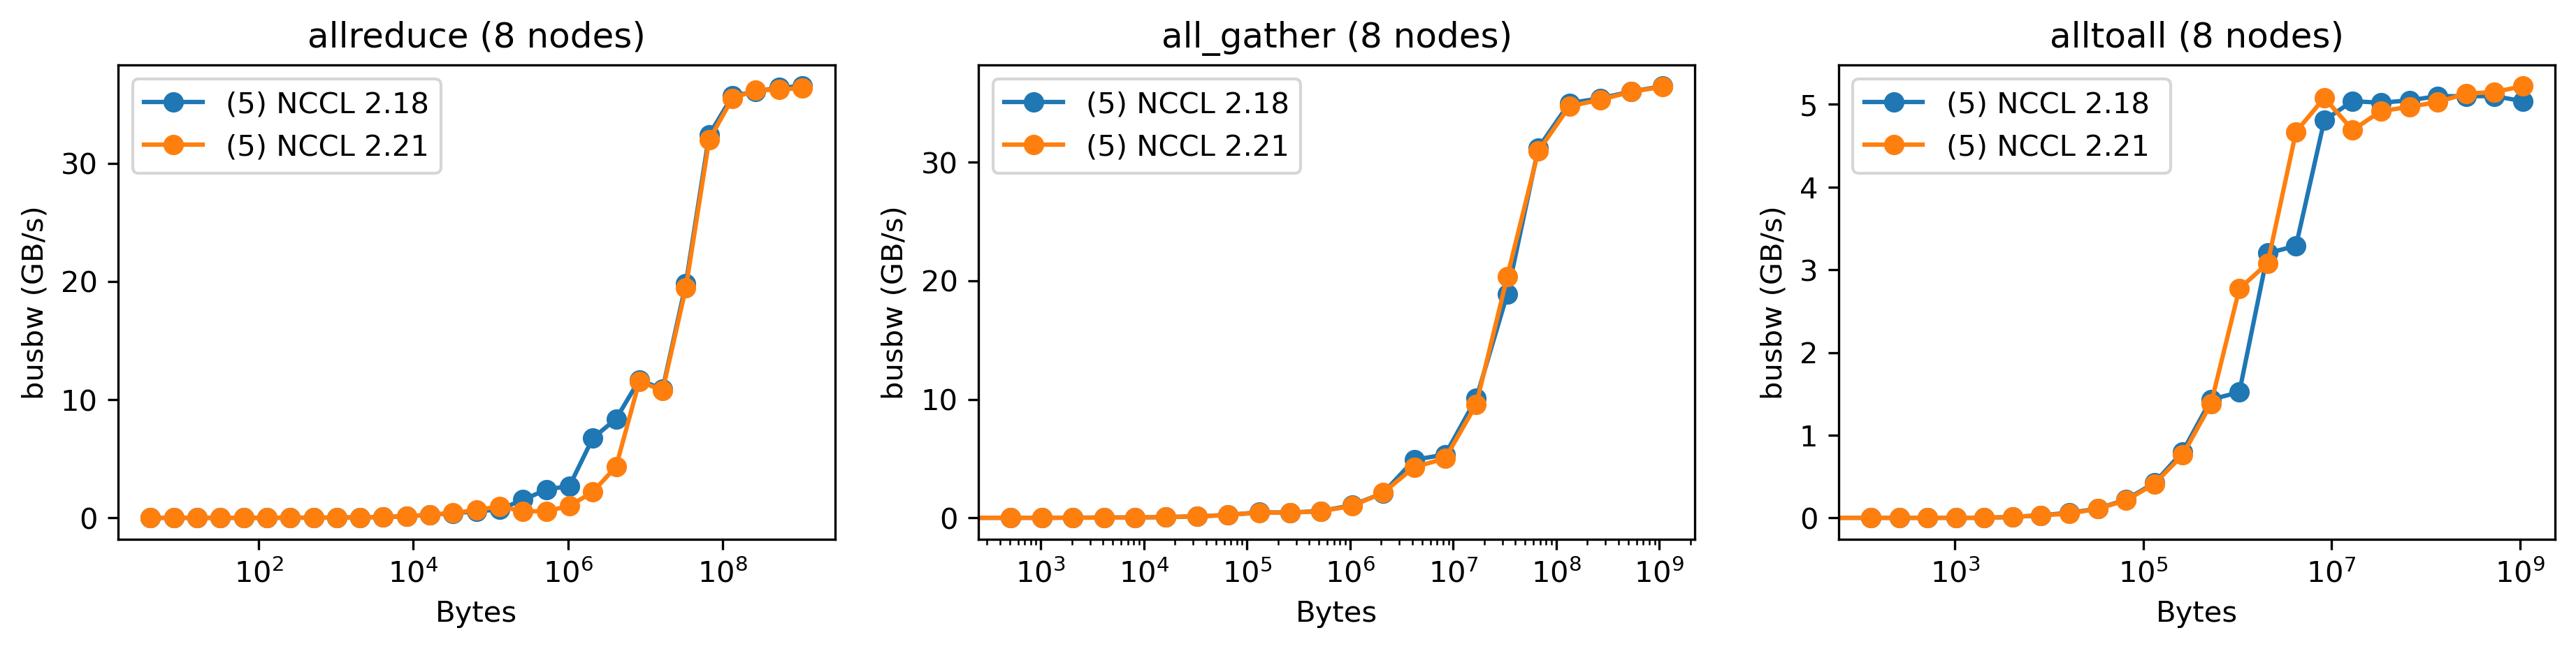

In [59]:
plt.figure(figsize=(15, 3), dpi=300)
plt.subplot(131)
plt.title("allreduce (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_18/n8.g4.2024-04-29-18-14-00//all_reduce_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.18')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_reduce_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.21')
plt.xscale('log')
plt.ylabel("busbw (GB/s)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(132)
plt.title("all_gather (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_18/n8.g4.2024-04-29-18-14-00//all_gather_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.18')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_gather_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.21')
plt.xscale('log')
plt.ylabel("busbw (GB/s)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(133)
plt.title("alltoall (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_18/n8.g4.2024-04-29-18-14-00//alltoall_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.18 ')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/alltoall_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.21 ')
plt.xscale('log')
plt.ylabel("busbw (GB/s)")
plt.xlabel("Bytes")
plt.legend(loc='upper left')
plt.show()

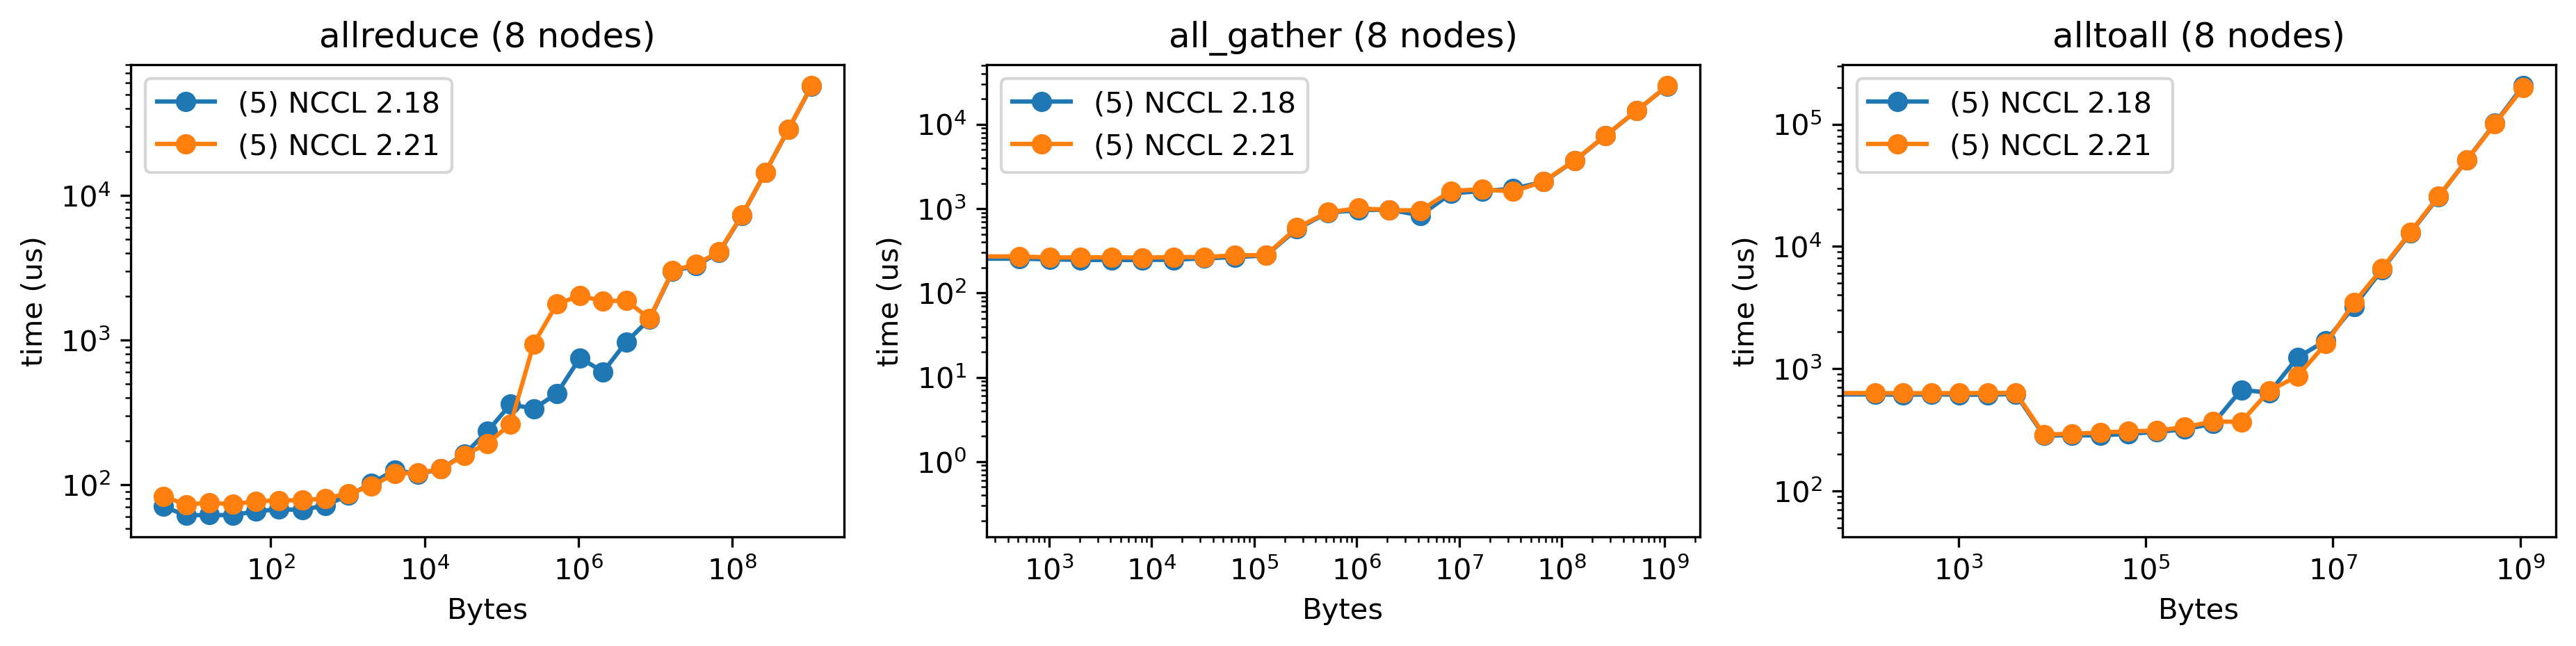

In [80]:
plt.figure(figsize=(15, 3), dpi=300)
plt.subplot(131)
plt.title("allreduce (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_18/n8.g4.2024-04-29-18-14-00//all_reduce_output.dat.5", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.18')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_reduce_output.dat.5", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.21')
plt.xscale('log')
plt.yscale('log')

plt.ylabel("time (us)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(132)
plt.title("all_gather (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_18/n8.g4.2024-04-29-18-14-00//all_gather_output.dat.5", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.18')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/all_gather_output.dat.5", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.21')
plt.xscale('log')
plt.yscale('log')

plt.ylabel("time (us)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(133)
plt.title("alltoall (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_18/n8.g4.2024-04-29-18-14-00//alltoall_output.dat.5", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.18 ')
allreduce = getPerf("./results_polaris/nccl_2_21/n8.g4.2024-04-29-21-23-48/alltoall_output.dat.5", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.21 ')
plt.xscale('log')
plt.yscale('log')

plt.ylabel("time (us)")
plt.xlabel("Bytes")
plt.legend(loc='upper left')
plt.show()

## 540 nodes

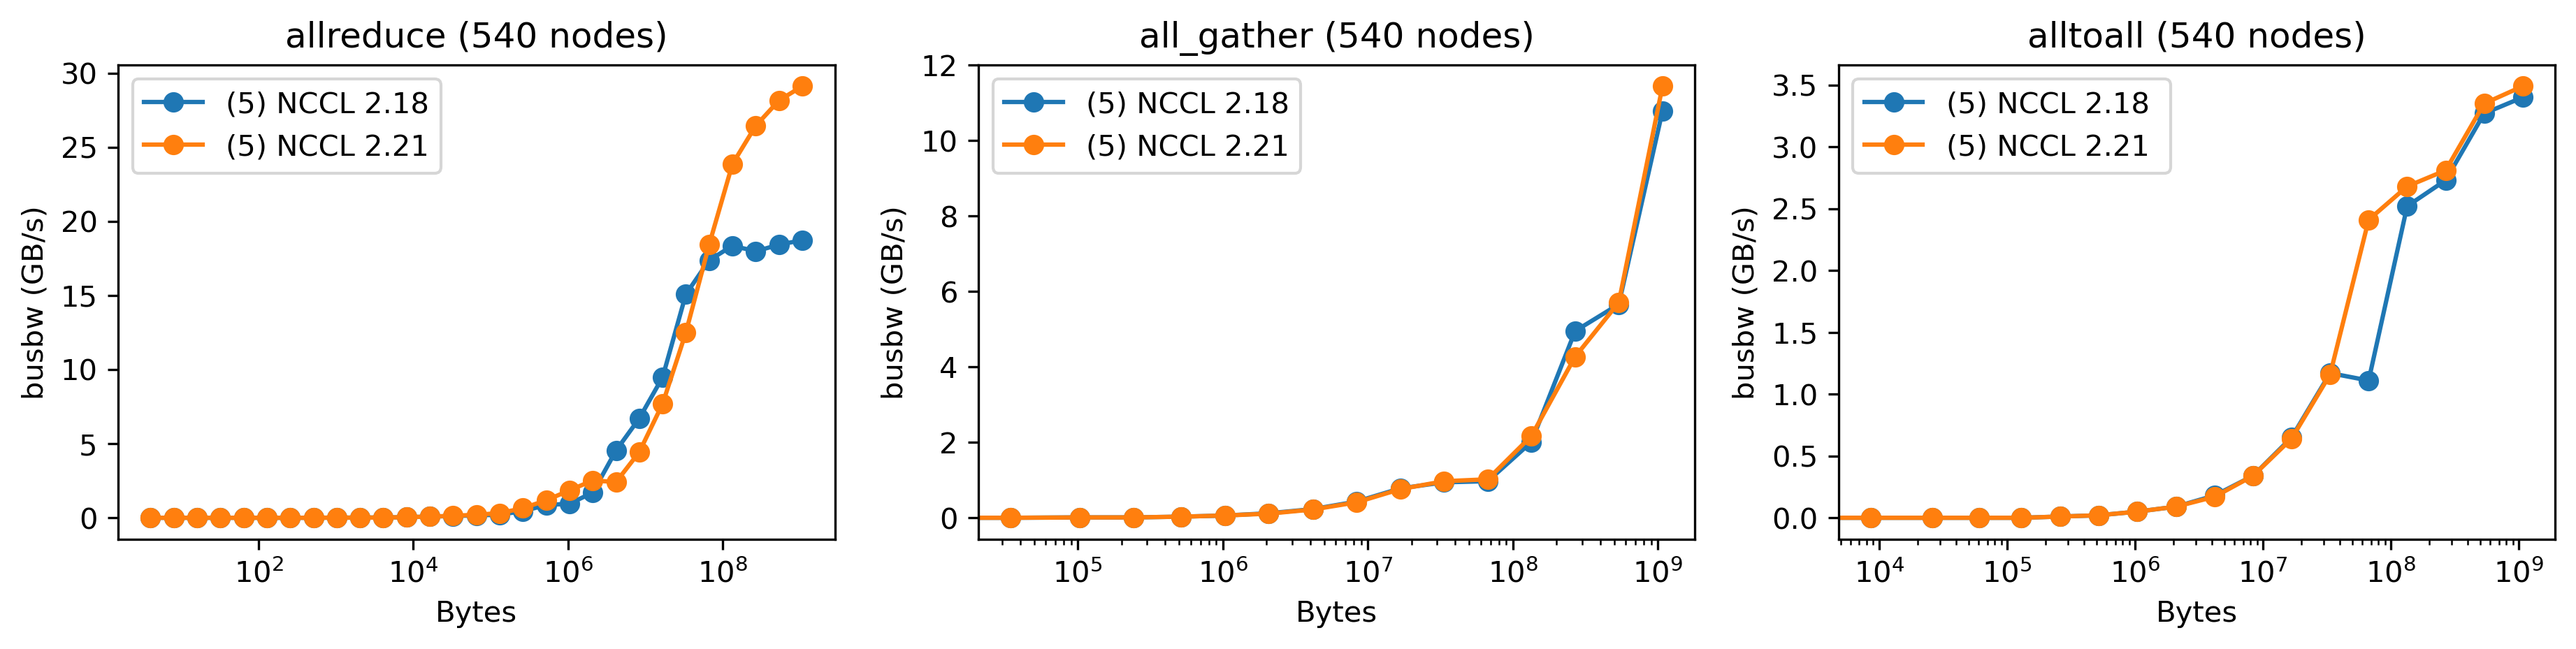

In [62]:
plt.figure(figsize=(15, 3), dpi=300)
plt.subplot(131)
plt.title("allreduce (540 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_18/n540.g4.2024-04-29-19-43-05/all_reduce_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.18')
allreduce = getPerf("./results_polaris//nccl_2_21/n540.g4.2024-04-29-19-39-24/all_reduce_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.21')
plt.xscale('log')
plt.ylabel("busbw (GB/s)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(132)
plt.title("all_gather (540 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_18/n540.g4.2024-04-29-19-43-05/all_gather_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.18')
allreduce = getPerf("./results_polaris//nccl_2_21/n540.g4.2024-04-29-19-39-24/all_gather_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.21')
plt.xscale('log')
plt.ylabel("busbw (GB/s)")
plt.xlabel("Bytes")
plt.legend()
plt.subplot(133)
plt.title("alltoall (540 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_18/n540.g4.2024-04-29-19-43-05/alltoall_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.18 ')
allreduce = getPerf("./results_polaris//nccl_2_21/n540.g4.2024-04-29-19-39-24/alltoall_output.dat.5")
plt.plot(allreduce[0], allreduce[1], '-o', label='(5) NCCL 2.21 ')
plt.xscale('log')
plt.ylabel("busbw (GB/s)")
plt.xlabel("Bytes")
plt.legend(loc='upper left')
plt.show()

## Comparison between Slingshot 11 with Slingshot 10

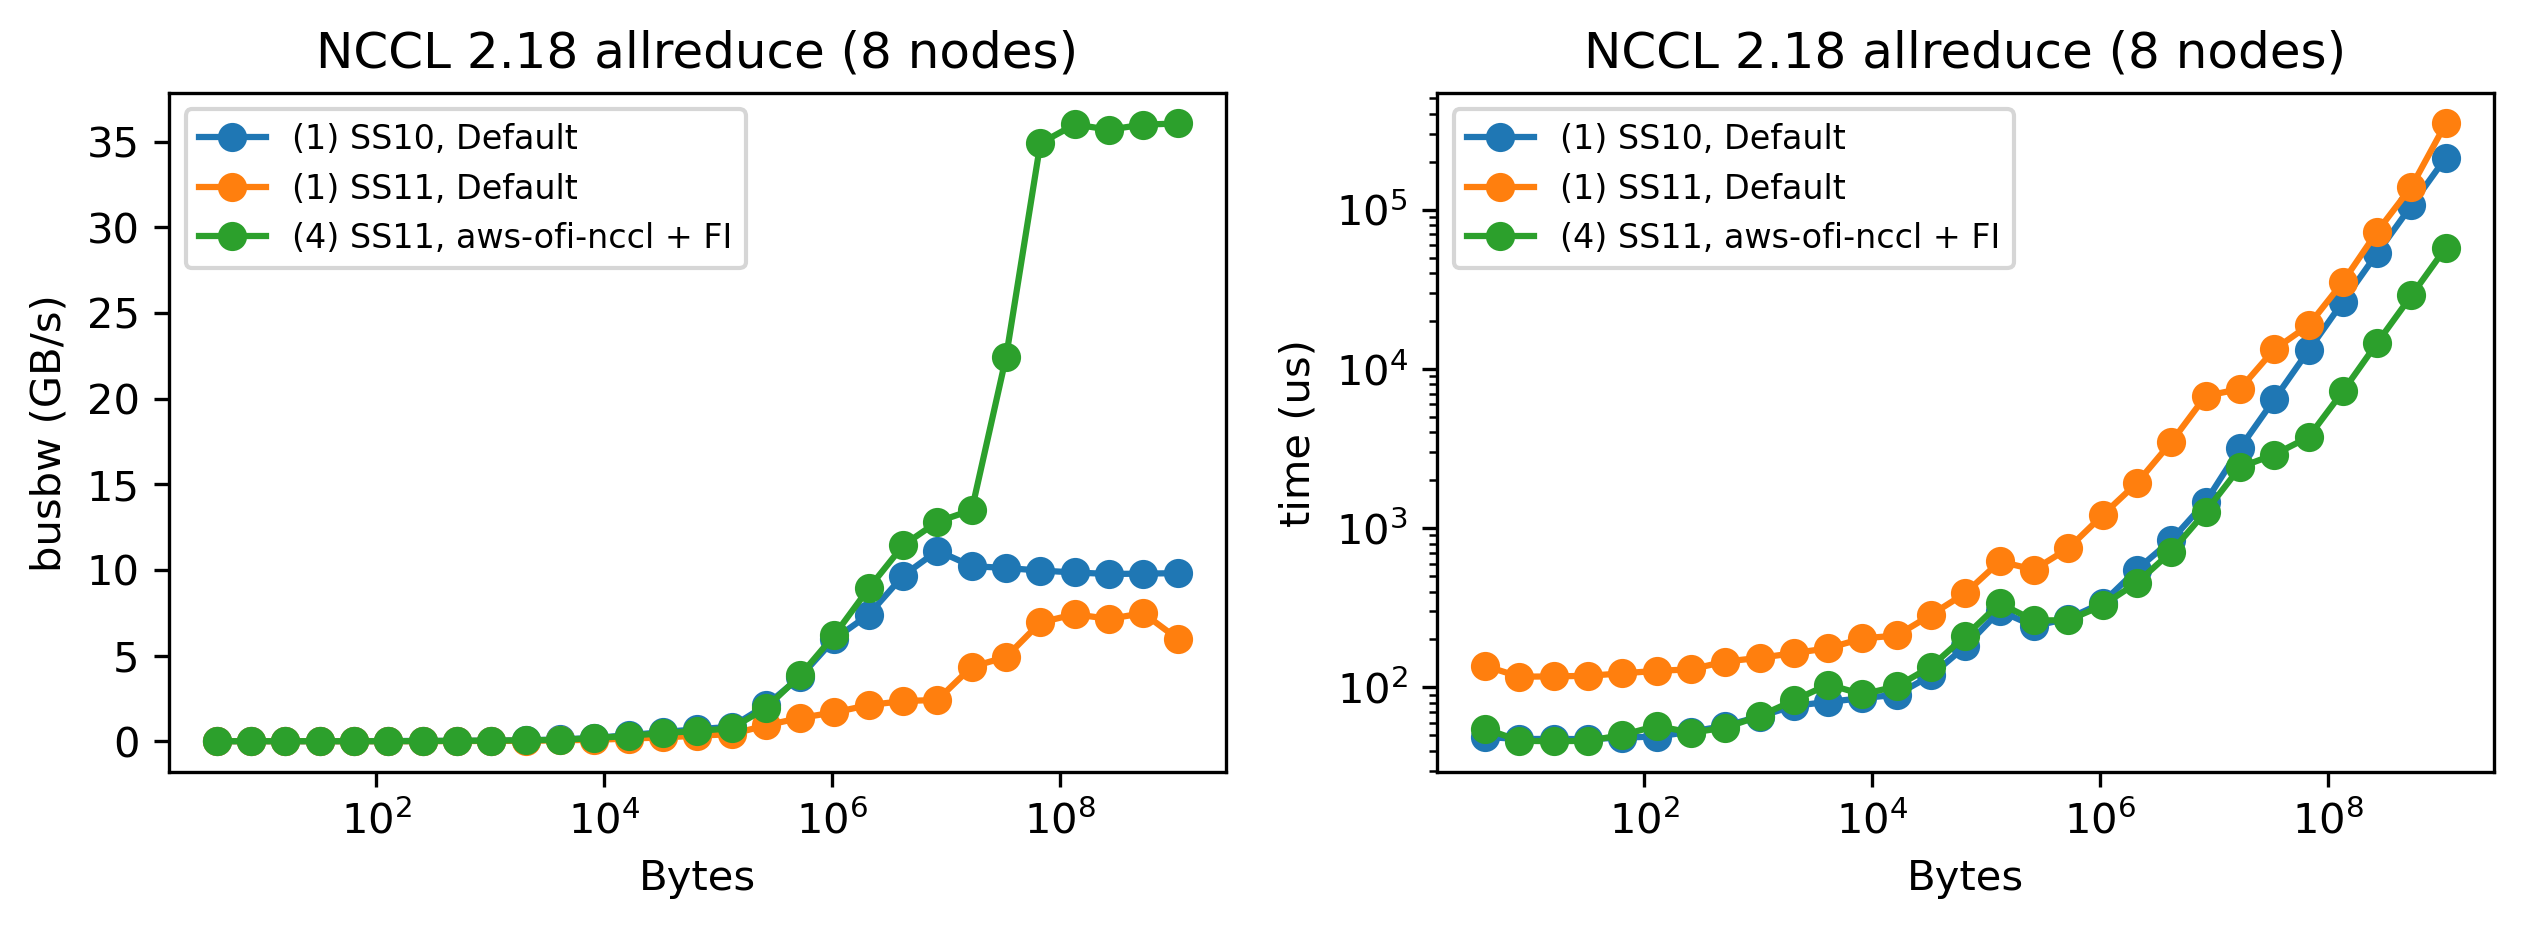

In [109]:
plt.figure(figsize=(10, 3), dpi=300)
plt.subplot(121)
plt.title("NCCL 2.18 allreduce (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_18/n8.g4.2023-10-13-14-07-13/all_reduce_output.dat.1")
plt.plot(allreduce[0], allreduce[1], '-o', label='(1) SS10, Default')
allreduce = getPerf("./results_polaris/nccl_2_18/n8.g4.2024-04-29-18-14-00/all_reduce_output.dat.1")
plt.plot(allreduce[0], allreduce[1], '-o', label='(1) SS11, Default')
allreduce = getPerf("./results_polaris/nccl_2_18/n8.g4.2024-04-29-18-14-00/all_reduce_output.dat.4")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) SS11, aws-ofi-nccl + FI')

plt.xscale('log')
plt.ylabel("busbw (GB/s)")
plt.xlabel("Bytes")
plt.legend(loc='upper left', fontsize=8)
plt.subplot(122)
plt.title("NCCL 2.18 allreduce (8 nodes)")
allreduce = getPerf("./results_polaris/nccl_2_18/n8.g4.2023-10-13-14-07-13/all_reduce_output.dat.1", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(1) SS10, Default')
allreduce = getPerf("./results_polaris/nccl_2_18/n8.g4.2024-04-29-18-14-00/all_reduce_output.dat.1", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(1) SS11, Default')
allreduce = getPerf("./results_polaris/nccl_2_18/n8.g4.2024-04-29-18-14-00/all_reduce_output.dat.4", "LT")
plt.plot(allreduce[0], allreduce[1], '-o', label='(4) SS11, aws-ofi-nccl + FI')

plt.xscale('log')
plt.yscale('log')
plt.ylabel("time (us)")
plt.xlabel("Bytes")
plt.legend(loc='upper left', fontsize=8)
plt.show()